In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

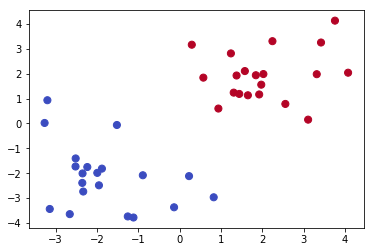

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

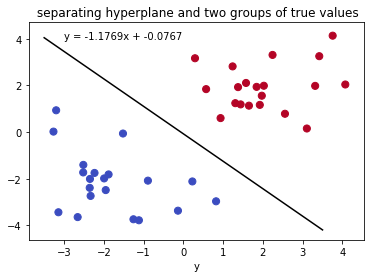

In [3]:
# your code here
# C. = 100000
import sklearn
from sklearn import svm

clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-3.5, 3.5)
b =  - (clf.intercept_[0]) / w[1]
x2 = a * x1 - (clf.intercept_[0]) / w[1]

plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')

equation = 'y = ' + str(round(a,4)) + 'x' ' + ' + str(round(b,4))
plt.text(-3,4, equation)

plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.xlabel('x')
plt.xlabel('y')
plt.title(' separating hyperplane and two groups of true values')
plt.axis('tight')
plt.show()




#### b. List the support vectors.

In [4]:
# your code here
print 'the coordinates of the support vectors are: \n',  clf.support_vectors_

the coordinates of the support vectors are: 
[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [5]:
# your code here
m = clf.support_vectors_[0]
b1 = (m[1] - a * m[0])
x2_down = a * x1 + (m[1] - a * m[0])
equation_down = 'lower line function: y = ' + str(round(a,4)) + 'x' ' + ' + str(round(b1,4))
print equation_down

n = clf.support_vectors_[-1]
b2 = (n[1] - a * n[0])
x2_up = a * x1 + (n[1] - a * n[0])
equation_up = 'upper line function y = ' + str(round(a,4)) + 'x' ' + ' + str(round(b2,4))
print equation_up

lower line function: y = -1.1769x + -1.8518
upper line function y = -1.1769x + 1.6981


#### d. Compute the width of the margin.

d=|b2- b1|/ sqrt(k**2 +1)

In [6]:
# your code here
w_margin = round(abs(b2-b1)/np.sqrt(a**2+1),5)
print 'width of margin is', w_margin

width of margin is 2.29861


#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. A very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

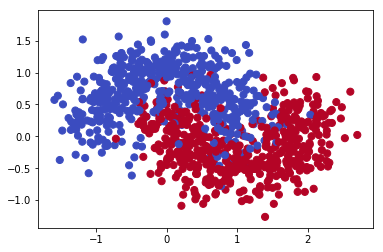

In [7]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [8]:
# your code here
IS = []
OS = []

clf_t2 = svm.SVC(kernel='poly')  
clf_t2.fit(X_train, Y_train)

correct_is=1.0*(clf_t2.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
IS.append(correct_is)
print "In sample, we successfully predict", round(np.mean(IS)*100,5),"percent of the data"

correct_os=1.0*(clf_t2.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
OS.append(correct_os)
print "Out of sample, we successfully predict", round(np.mean(OS)*100,5),"percent of the data"

In sample, we successfully predict 81.34328358208955 percent of the data
Out of sample, we successfully predict 82.72727272727273 percent of the data


/Users/xiaoguihua/anaconda3/envs/python2_envi/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


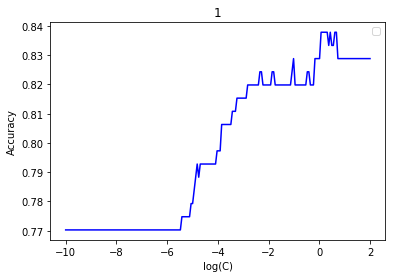

max C =  0.07035175879396854 max accuracy value is 0.8378378378378378 



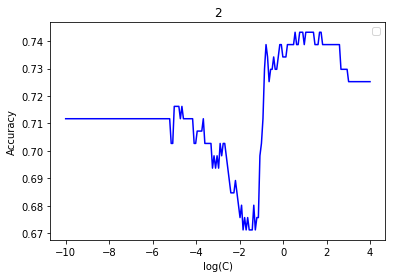

max C =  0.5527638190954764 max accuracy value is 0.7432432432432432 



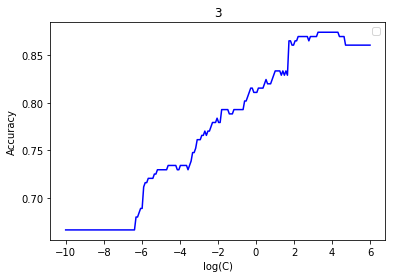

max C =  3.266331658291458 max accuracy value is 0.8738738738738738 



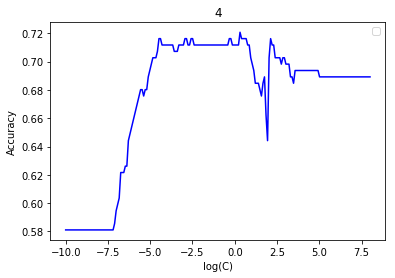

max C =  0.31155778894472336 max accuracy value is 0.7207207207207207 



In [9]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
import math
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

for i in range(1,5):
    C = [math.exp(a) for a in np.linspace(-10,2*i,200)]
    C_log = [np.log(c) for c in C]
    OS_poly = []
    for j in C:
        clf = svm.SVC(kernel='poly',degree=i, C = j)
        clf.fit(X_train_1, Y_train_1)
        
        correct_poly=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_poly.append(correct_poly)
    
    temp=pd.DataFrame([C_log,OS_poly]).T # put results together.
    #print temp
    plt.gca()
    plt.plot(C_log,OS_poly,'b')
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.title(i)
    plt.show()
    
    print 'max log(C) = ', temp.iloc[temp[1].idxmax()][0], 'max accuracy value is', temp.iloc[temp[1].idxmax()][1],'\n'
    
    
    

# your code here

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [25]:
# your code here

# according to the graphs above, 
#  the optimal degree is 3 and the optimal regularization constant is C = 10** 3.266


clf_opti = svm.SVC(kernel='poly',degree=3, C = 10**3.266)
clf_opti.fit(X_train_1, Y_train_1)

correct_opti=1.0*(clf_opti.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
print "Out of sample, we successfully predict", round(correct_opti*100,5),"percent of the data"

Out of sample, we successfully predict 86.03604 percent of the data


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = 6/11

P(No) = 5/11

P(Red|Yes) = 5/6

P(SUV|Yes) = 1/3

P(Domestic|Yes) = 1/2

P(Red|No) = 2/5

P(SUV|No) = 3/5

P(Domestic|No) = 3/5

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

P(Yes | red & domestic & SUV) = $$\frac {P(Red|Yes)P(Domestic|Yes)P(SUV|Yes)P(Yes)} {P(Red|Yes)P(Domestic|Yes)P(SUV|Yes)P(Yes) + P(Red|No)P(Domestic|No)P(SUV|No)P(No)}$$

**The result is 125/233**

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [11]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print X_train.head()

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [12]:
# your code here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)


# measure accuracy for the binary prediction task
print 'In sample prediction accuracy:',round(1.0*sum((gnb.predict(X_train)==y_train))/len(y_train),5)
print 'Out of sample prediction accuracy:',round(1.0*sum((gnb.predict(X_test)==y_test))/len(y_test),5)

In sample prediction accuracy: 0.75847
Out of sample prediction accuracy: 0.79114


### b) What is the prior probability of diabetes, learned from the training data?

In [13]:
data_train.head()

,Unnamed: 0,y,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,710,0.0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,372,0.0,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,460,0.0,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,704,0.0,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
4,70,1.0,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0


In [14]:
# your code here
pprob_diabetes = len(data_train.loc[data_train['y'] ==1.0])*1.0 / len(data_train) *1.0
pprob_diabetes 

0.3008474576271186

### c) What is the mean and variance of each input variable for patients with diabetes?

In [15]:
# your code here
with_diabetes_train = data_train.loc[data_train['y'] ==1]
print 'the mean and variance of each input variable for patients with diabetes \n'
for i in with_diabetes_train.columns[2:]:
    print 'for input variable ', i , ', mean is' , with_diabetes_train[i].mean()
    print 'for input variable ', i , ', std is' , with_diabetes_train[i].std()
    print 'for input variable ', i , ', variance is' , with_diabetes_train[i].var(), '\n'

the mean and variance of each input variable for patients with diabetes 

for input variable  t_pre , mean is 4.070422535211268
for input variable  t_pre , std is 3.5186196305693183
for input variable  t_pre , variance is 12.380684104627765 

for input variable  glu , mean is 144.14084507042253
for input variable  glu , std is 30.62645717799651
for input variable  glu , variance is 937.9798792756541 

for input variable  blood_p , mean is 74.56338028169014
for input variable  blood_p , std is 13.79930887955335
for input variable  blood_p , variance is 190.4209255533199 

for input variable  triceps , mean is 33.478873239436616
for input variable  triceps , std is 9.762697453543078
for input variable  triceps , variance is 95.31026156941651 

for input variable  serum , mean is 209.2112676056338
for input variable  serum , std is 126.92100079441516
for input variable  serum , variance is 16108.940442655934 

for input variable  b_m , mean is 35.22394366197183
for input variable  b_m , s

### d) What is the mean and variance of each input variable for patients without diabetes?

In [16]:
# your code here
no_diabetes_train = data_train.loc[data_train['y'] ==0.0]
print 'the mean and variance of each input variable for patients with no diabetes \n'
for i in no_diabetes_train.columns[2:]:
    print 'for input variable ', i , ', mean is' , no_diabetes_train[i].mean()
    print 'for input variable ', i , ', std is' , no_diabetes_train[i].std()
    print 'for input variable ', i , ', variance is' , no_diabetes_train[i].var(), '\n'

the mean and variance of each input variable for patients with no diabetes 

for input variable  t_pre , mean is 2.690909090909091
for input variable  t_pre , std is 2.610060698804003
for input variable  t_pre , variance is 6.81241685144124 

for input variable  glu , mean is 111.46666666666667
for input variable  glu , std is 24.691889982225113
for input variable  glu , variance is 609.6894308943089 

for input variable  blood_p , mean is 69.2060606060606
for input variable  blood_p , std is 11.713290850878762
for input variable  blood_p , variance is 137.2011825572801 

for input variable  triceps , mean is 27.2
for input variable  triceps , std is 10.436918524769796
for input variable  triceps , variance is 108.92926829268292 

for input variable  serum , mean is 127.0060606060606
for input variable  serum , std is 91.48613762575854
for input variable  serum , variance is 8369.713377679233 

for input variable  b_m , mean is 31.70909090909091
for input variable  b_m , std is 6.33761

## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [17]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

#X_Labeled_train
#y_Labeled_train

### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [18]:
# your code here

def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [19]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
y_Labeled_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_Labeled_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

print 'In sample prediction accuracy:',1.0*sum((y_Labeled_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train)
print 'Out of sample prediction accuracy:',1.0*sum((y_Labeled_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

In sample prediction accuracy: 1.0
Out of sample prediction accuracy: 0.694444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [22]:
# your code here
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print 'Iteration',t,'of',num_iters
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]).reset_index(drop=True)
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled]).reset_index(drop=True)
        
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc


In [27]:
naive_bayes_classifier_new = EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,10)
y_Labeled_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier_new)

print 'Out of sample prediction accuracy:',1.0*sum((y_Labeled_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)


Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
Out of sample prediction accuracy: 0.944444444444
